### PARCIAL 3 - SISTEMAS INTELIGENTES

**Librerias**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Cargando Dataframe**

In [18]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Parcial3_Sistemas_Inteligentes\BaseDatos\P10.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8,Clase
0,-0.007812,0.000000,0.007812,0.007812,0.023438,0.070312,0.000000,0.007812,0
1,-0.015625,-0.023438,-0.031250,-0.007812,0.000000,0.023438,-0.007812,0.000000,0
2,-0.007812,0.007812,-0.007812,0.000000,-0.039062,-0.070312,-0.023438,-0.015625,0
3,-0.015625,-0.007812,-0.007812,-0.015625,-0.023438,0.007812,-0.015625,0.046875,0
4,-0.015625,0.007812,0.000000,0.000000,0.000000,0.039062,0.000000,-0.007812,0
...,...,...,...,...,...,...,...,...,...
35995,-0.007812,-0.015625,0.000000,-0.007812,-0.015625,-0.007812,0.000000,-0.023438,5
35996,0.000000,0.000000,-0.015625,-0.015625,-0.023438,0.000000,-0.007812,-0.007812,5
35997,0.000000,0.000000,-0.015625,-0.015625,0.000000,-0.023438,-0.015625,0.000000,5
35998,-0.015625,-0.007812,0.000000,-0.007812,-0.007812,0.000000,-0.007812,-0.007812,5


**Funciones de Características**

In [19]:
def zcruce(X, th):                             
    th = 0
    cruce = 0
    for cont in range(len(X) - 1):
        can = X[cont] * X[cont + 1] 
        can2 = abs(X[cont] - X[cont + 1])    
        if can < 0 and can2 > th:
            cruce = cruce + 1
    return cruce

def wilson_amplitude(signal, th):
  values_list = []
  amp=0
  for cont in range(len(signal)-1):
    aa = abs(signal[cont] - signal[cont + 1])
    if (aa >= th):
      amp=amp+1
    values_list.append(amp)
  mean_abs_w_val = np.sum(values_list)
  return mean_abs_w_val

def myopulse(signal, th):
  values_list = []
  mp = 0
  for cont in range(len(signal)):
    if (signal[cont] >= th):
      mp = mp + 1
    values_list.append(mp)
  mean_abs_w_val = np.mean(values_list)
  return mean_abs_w_val

def emav(data: pd.Series) -> float:
  values_list = []
  for row in range(len(data)):
    row += 1
    if row <= 0.8*len(data) and row >= 0.25*len(data):
      w = 0.75
    else:
      w = 0.5
    values_list.append(abs(data[row-1])**w)  
  mean_abs_w_val = np.mean(values_list)
  return mean_abs_w_val

def mmav(data: pd.Series) -> float:
  values_list = []
  for row in range(len(data)):
    row += 1
    if row <= 0.75*len(data) and row >= 0.25*len(data):
      w = 1
    else:
      w = 0.5
    values_list.append((abs(data[row-1]))*w)
  mean_abs_w_val = np.mean(values_list)
  return mean_abs_w_val

def mmav2(data: pd.Series) -> float:
  values_list = []
  for row in range(len(data)):
    row += 1
    if row <= 0.75*len(data) and row >= 0.25*len(data):
      w = 1
    elif row < 0.25*len(data) :
      w = 4*row/len(data)
    else:
      w = 4*(len(data)-row)/len(data)
    values_list.append(abs(data[row-1])*w)
  mean_abs_w_val = np.mean(values_list)
  return mean_abs_w_val

def ewl(data: pd.Series) -> float:
  values_list = []
  for row in range(len(data)):
    row+=2
    if(row<(len(data)-1)):
      row += 1
      if row <= 0.8*len(data) and row >= 0.25*len(data):
        w = 0.75
      else:
        w = 0.5
      values_list.append(abs((data[row-1])-(data[row]))**w)
  mean_abs_w_val = np.sum(values_list)
  return mean_abs_w_val

def ssc(x,th):
  N=len(x)
  ssc=0
  for k in range (N-1):   
    k+=2   
    if(k<(len(x)-1)):  
      if(((x[k]>x[k-1]) and (x[k]>x[k+1]))or((x[k]<x[k-1]) and (x[k]<x[k+1])))and(((abs(x[k]-x[k+1]))>=th)or((abs(x[k]-x[k-1]))>=th)):
        ssc=ssc+1
  return ssc


FEATURES = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','WAMP','MFL','Label']

**Mostrar Segmento de la Señal**

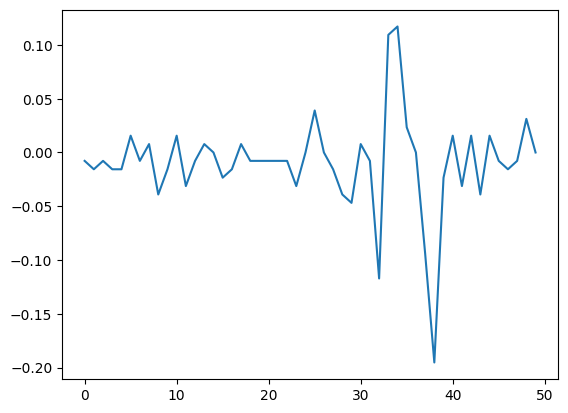

In [20]:
data1=df.iloc[:,0]
data2=data1[0:50]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='tab:blue')
plt.show()

**Inicializar asolapamiento**

In [38]:
i=0
j=0
k=50
Emav=[];Ewl=[];Mav=[];Wl=[];Zc=[];Ssc=[];Rms=[];Aac=[];Dasdv=[];Ld=[];Mmav=[];Mmav2=[];Myop=[];Ssi=[]; Var=[];Wamp=[];Mfl=[]; label=[]

**Extracción de Características**

In [39]:
#//////Segmentacion y extraccion de caracteristicas///////
#clase 1

i = 0

for k in range(50,6000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(0)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+25

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\3985732319.py:23: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log


In [40]:
# Clase 2

i = 6000

for k in range(6050,12000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(1)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+50

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\610403446.py:22: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
c:\Users\JUANPABLOGASCA\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\JUANPABLOGASCA\miniconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\JUANPABLOGASCA\miniconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\JUANPABLOGASCA\miniconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\JUANPABLOGASCA\miniconda3\lib\s

In [41]:
# Clase 3

i = 12000

for k in range(12050,18000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(2)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+25

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\3506436313.py:22: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log


In [42]:
# Clase 4

i = 18000

for k in range(18050,24000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(3)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+25

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\1909498715.py:22: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log


In [43]:
# Clase 5

i = 24000

for k in range(24050,30000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(4)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+25

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\288953264.py:22: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log


In [44]:
# Clase 6

i = 30000

for k in range(30050,36000,25):  
  while(j<8):

    data1=df.iloc[:,j]
    data2=data1[i:k]
    X = data2.values
    th = np.mean(X) + 3 * np.std(X)                                   #umbral

    Emav.append(emav(X))                                              #Valor Absoluto Medio Mejorado 
    Ewl.append(ewl(X))                                                #Longitud de onda mejorado 
    Mav.append(np.mean(abs(X)))                                       #Valor absoluto medio
    Wl.append(np.sum(abs(np.diff(X))))                                #Longitud de onda  
    Zc.append(zcruce(X, th))                                          #Cruce por zero               
    Ssc.append(ssc(X,th))                                             #Cambio de pendiente de señal
    Rms.append(np.sqrt(np.mean(X**2)))                                #Raiz cuadrada media
    Aac.append(np.mean(abs(np.diff(X))))                              #Variacion media de la amplitud
    Dasdv.append(np.sqrt((1/(len(X)-1))*np.sum((np.diff(X))**2)))     #Diferencia Desviación Estándar Absoluta Valor
    Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log
    Mmav.append(mmav(X))                                              #Valor absoluto medio modificado
    Mmav2.append(mmav2(X))                                            #Valor absoluto medio modificado 2
    Myop.append(myopulse(X, th))                                      #Tasa de porcentaje del impulso mioelectrico 
    Ssi.append(np.sum(X**2))                                          #Integral cuadrada simple
    Var.append(np.var(X))                                             #Varianza
    Wamp.append(wilson_amplitude(X, th))                              #Amplitud Willison 
    Mfl.append(mfl(X))  
    label.append(5)                                            #Longitud maxima fractal

    #print(i ,',', k)
    #print(j)
    
    j=j+1
  j = 0
  i=i+25

C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_11144\3465079883.py:22: RuntimeWarning: divide by zero encountered in log10
  Ld.append(np.exp(np.mean(np.log10(abs(X)))))                      #Detector de log


In [45]:
len(Mmav)

11424

In [46]:
data = [Emav,Ewl,Mav,Wl,Zc,Ssc,Rms,Aac,Dasdv,Ld,Mmav,Mmav2,Myop,Ssi,Var,Wamp,Mfl,label]  #Union de caracteristicas

In [47]:
df_features = pd.DataFrame({
    FEATURES[0]:data[0],
    FEATURES[1]:data[1],
    FEATURES[2]:data[2],
    FEATURES[3]:data[3],
    FEATURES[4]:data[4],
    FEATURES[5]:data[5],
    FEATURES[6]:data[6],
    FEATURES[7]:data[7],
    FEATURES[8]:data[8],
    FEATURES[9]:data[9],
    FEATURES[10]:data[10],
    FEATURES[11]:data[11],
    FEATURES[12]:data[12],
    FEATURES[13]:data[13],
    FEATURES[14]:data[14],
    FEATURES[15]:data[15],
    FEATURES[16]:data[16],
    FEATURES[17]:data[17]
})

In [48]:
df_features

,EMAV,EWL,MAV,WL,ZC,SSC,RMS,AAC,DASDV,LD,MMAV,MMAV2,MYOP,SSI,VAR,WAMP,MFL,Label
0,0.092832,5.400924,0.026875,1.789062,19,2,0.045635,0.036511,0.056281,0.0,0.020000,0.022587,0.00,0.104126,0.001989,28.0,-0.404537,0
1,0.079050,4.254924,0.019688,1.304688,19,2,0.029106,0.026626,0.036354,0.0,0.014609,0.015894,0.34,0.042358,0.000759,28.0,-0.594352,0
2,0.064001,3.124028,0.012656,0.773438,10,9,0.016573,0.015784,0.020244,0.0,0.008984,0.008837,0.00,0.013733,0.000190,114.0,-0.848612,0
3,0.050815,2.954137,0.010000,0.625000,9,8,0.012979,0.012755,0.016173,0.0,0.007891,0.007744,0.00,0.008423,0.000112,214.0,-0.946100,0
4,0.057592,3.167502,0.011875,0.781250,8,9,0.015934,0.015944,0.018940,0.0,0.009062,0.008837,0.00,0.012695,0.000172,211.0,-0.877514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,0.061535,2.152507,0.010781,0.460938,7,5,0.012646,0.009407,0.012277,0.0,0.008047,0.008263,0.00,0.007996,0.000075,135.0,-1.065817,5
11420,0.064933,2.506741,0.012031,0.507812,7,10,0.013932,0.010364,0.013532,0.0,0.008672,0.008513,0.00,0.009705,0.000084,145.0,-1.023551,5
11421,0.050219,1.819601,0.008438,0.390625,4,5,0.010482,0.007972,0.011491,0.0,0.006484,0.006419,0.54,0.005493,0.000058,99.0,-1.094557,5
11422,0.056379,2.725826,0.010000,0.523438,9,7,0.012500,0.010682,0.012577,0.0,0.007656,0.007400,0.00,0.007812,0.000090,78.0,-1.055308,5


In [49]:
df_features.to_csv('Features_EMG_P10_MyoArmband.csv',index=False)